# Demo2: Simple Harmonic Oscillator with RK2/RK4

In this jupyter notebook, we will learn how to use the Runge-Kutta 2/4 methods to solve for the motions of a simple harmonic oscillaotr.

&copy; Kuo-Chuan Pan, 2024\
For the course "Computational Physics" at NTHU

### Governing equations

The governing equations are 
$$
a^{t^n} = - \omega_0^2 x^{t^n},
$$

$$
\frac{dx}{dt} = v,
$$
and 
$$
\frac{dv}{dt} = a.
$$


### Runge-Jutta methods

Higher-order explicit schemes.

* RK2

$$
y_{k+1} = y_k + \frac{h_k}{2}(k_1 + k2),
$$
where $k_1 = f(t_k, y_k)$ and $k_2 = f(t_k+h_k, y_k + h_k k1)$.

* RK4

$$
y_{k+1} = y_k + \frac{h_k}{6}(k_1 +2k_2 +2k_3+k_4),
$$
where $k_1= f(t_k,y_k)$, $k_2=f(t_k+h_k/2, y_k + (h_k/2)k_1)$,
$k_3=f(t_k+h_k/2, y_k + (h_k/2)k_2)$, and $k_4=f(t_k+h_k, y_k+h_k k3)$.


### Initial Conditions

At time $t=0$, position $x=1$ and velocity $v=0$.\
Set $A=k=m=1$, and $\omega_0=\sqrt{k/m}=1$ as well.

## Exercie 1: Redo demo1 with the RK2 method
Use a small time step $\Delta t=0.01$ and solve for the solution at $t=20$.

In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the RK2 method
#
# TODO:

def euler(y,dt=0.01,tmax=20,A=1,k=1,m=1):
    # Step 1: set up the parameters of the problem
    omega0 = np.sqrt(k/m)
    # Step 2: set up the time and solution arrays
    time = np.linspace(0,tmax,int(tmax/dt)+1,endpoint=True)
    sol = np.empty((2,len(time)))
    # Step 3: set up the initial conditions
    sol[:,0] = y
    # Step 4: solve the difference equation using the Euler method
    for i in range(len(time)):
        if i > 0:
            def f(tk,yk):
                return np.array([yk[1],-omega0**2*yk[0]])
            sol[:,i] = sol[:,i-1]+f(time[i-1],sol[:,i-1])*dt
    return time,sol


In [12]:
A=1
k=1
m=1
omega0 = np.sqrt(k/m)
dt = 0.01
x0 = 1
v0 = 0
a0 = -omega0**2*x0
y = [x0,v0]

time,sol = euler(y)

In [23]:
def RK2(y,dt=0.01,tmax=20,A=1,k=1,m=1):
    omega0 = np.sqrt(k/m)
    time = np.linspace(0,tmax,int(tmax/dt)+1,endpoint=True)
    sol = np.empty((2,len(time)))
    sol[:,0] = y
    for i in range(len(time)):
        if i > 0:
            def f(tk,yk):
                return np.array([yk[1],-omega0**2*yk[0]])
            k1 = f(time[i-1],sol[:,i-1])
            k2 = f(time[i-1]+dt,sol[:,i-1]+k1*dt)
            sol[:,i] = sol[:,i-1]+(k1+k2)/2*dt
    return time,sol

RK2_time,RK2_sol = RK2(y)

In [31]:
def RK4(y,dt=0.01,tmax=20,A=1,k=1,m=1):
    omega0 = np.sqrt(k/m)
    time = np.linspace(0,tmax,int(tmax/dt)+1,endpoint=True)
    sol = np.empty((2,len(time)))
    sol[:,0] = y
    for i in range(len(time)):
        if i > 0:
            def f(tk,yk):
                return np.array([yk[1],-omega0**2*yk[0]])
            k1 = f(time[i-1],sol[:,i-1])
            k2 = f(time[i-1]+dt/2,sol[:,i-1]+k1*dt/2)
            k3 = f(time[i-1]+dt/2,sol[:,i-1]+k2*dt/2)
            k4 = f(time[i-1]+dt,sol[:,i-1]+k3*dt)
            sol[:,i] = sol[:,i-1]+(k1+2*k2+2*k3+k4)/6*dt
    return time,sol

RK4_time,RK4_sol = RK4(y)

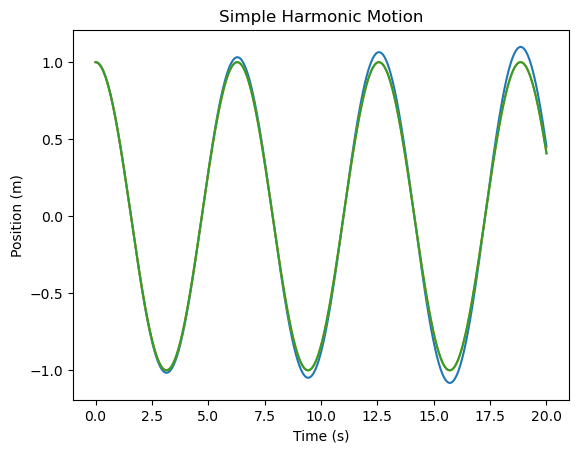

In [32]:
# Step 5: plot the solution
plt.plot(time,sol[0,:])
plt.plot(RK2_time,RK2_sol[0,:])
plt.plot(RK4_time,RK4_sol[0,:])
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.show()

We could verify our numerical solution be comparing it with the analytical solutions.
The analytical solutions are:

$$
x = A \cos(\omega_0 t + \phi),
$$
and

$$
v = -A \omega_0 \sin(\omega_0 t + \delta).

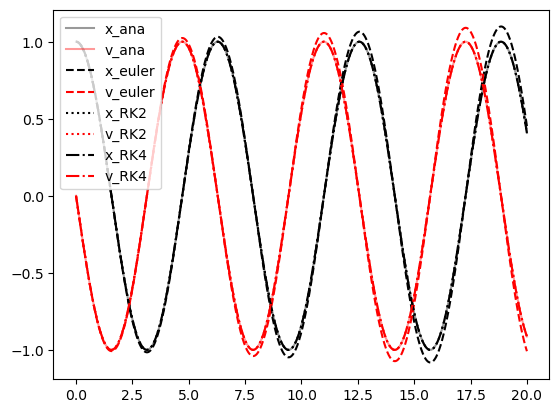

In [33]:
# Step 6: evaluate the analytical solution

# TODO:

def x_ana(t,phi = 0):
    return A*np.cos(omega0*t+phi)

def v_ana(t,delta = 0):
    return -A*omega0*np.sin(omega0*t+delta)


plt.plot(time,x_ana(time),label = 'x_ana',c = 'k',alpha = .4)
plt.plot(time,v_ana(time),label = 'v_ana',c = 'r',alpha = .4)
plt.plot(time,sol[0,:],label = 'x_euler',c = 'k',ls = '--')
plt.plot(time,sol[1,:],label = 'v_euler',c = 'r',ls = '--')
plt.plot(RK2_time,RK2_sol[0,:],label = 'x_RK2',c = 'k',ls = ':')
plt.plot(RK2_time,RK2_sol[1,:],label = 'v_RK2',c = 'r',ls = ':')
plt.plot(RK4_time,RK4_sol[0,:],label = 'x_RK4',c = 'k',ls = '-.')
plt.plot(RK4_time,RK4_sol[1,:],label = 'v_RK4',c = 'r',ls = '-.')
plt.legend()


Another way to chekc the accuray of our numerical solution is to check the energy conservation and the phase-sapce diagram.

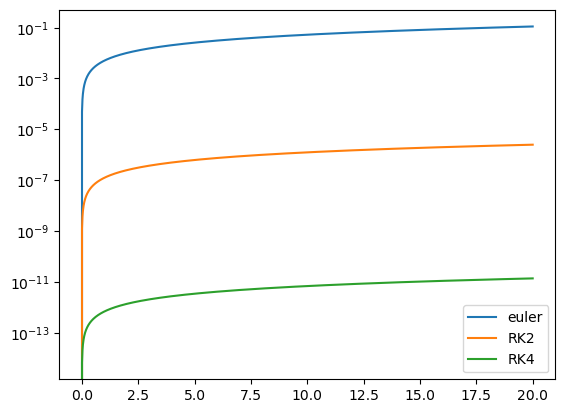

In [41]:
# Step 7: evaluate the energy (error) of the system

# TODO:
etot = 0.5*(sol[0,:]**2+sol[1,:]**2)
RK2_etot = 0.5*(RK2_sol[0,:]**2+RK2_sol[1,:]**2)
RK4_etot = 0.5*(RK4_sol[0,:]**2+RK4_sol[1,:]**2)
plt.plot(time,abs(etot-etot[0]),label = 'euler')
plt.plot(time,abs(RK2_etot-RK2_etot[0]),label = 'RK2')
plt.plot(time,abs(RK4_etot-RK4_etot[0]),label = 'RK4')
plt.yscale('log')
plt.legend()

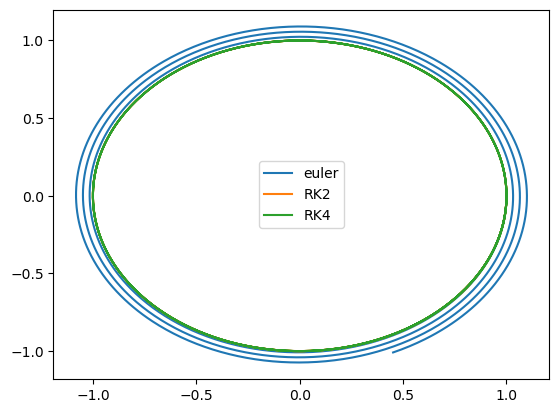

In [36]:
# Step 8: evaluate the phase space

# TODO:

plt.plot(sol[0,:],sol[1,:],label = 'euler')
plt.plot(RK2_sol[0,:],RK2_sol[1,:],label='RK2')
plt.plot(RK4_sol[0,:],RK4_sol[1,:],label='RK4')
plt.legend()



## Exercise 2: Repeat with RK4


In [ ]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the RK4 method
#

# TODO:









In [42]:
# error convergence estimator

def convergence(dts,method='euler'):
    """
    Parameters:
    dts: an numpy array of time steps to use
    method: a string specifying the method to use. Default is 'euler'

    Return:
    errs: an numpy array of errors for each time step
    """
    errs = np.zeros(len(dts))
    for i,dt in enumerate(dts):
        if method == 'euler':
            t,sol = euler([1,0],dt=dt)
        elif method == 'RK2':
            t,sol = RK2([1,0],dt=dt)
        elif method == 'RK4':
            t,sol = RK4([1,0],dt=dt)
        etot = 0.5*(sol[0,:]**2+sol[1,:]**2)
        errs[i] = abs(etot[-1]-etot[0])
    return errs

In [50]:
dts = np.logspace(-6,-1,8)
errs_euler = convergence(dts, 'euler')
errs_RK2 = convergence(dts, 'RK2')
errs_RK4 = convergence(dts, 'RK4')

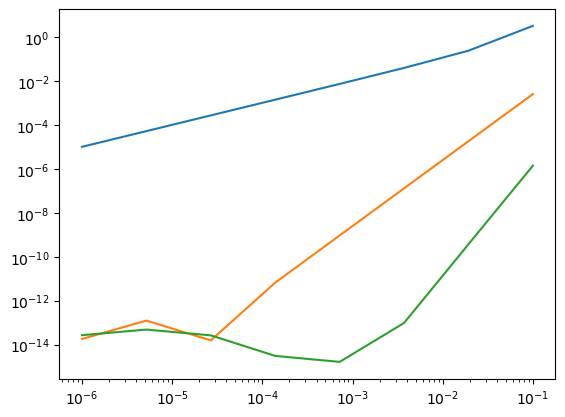

In [51]:
plt.plot(dts,errs_euler)
plt.plot(dts,errs_RK2)
plt.plot(dts,errs_RK4)
plt.yscale('log')
plt.xscale('log')